In [7]:
import os
import librosa
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [8]:
# Hàm trích xuất MFCCs với delta và delta-delta
def extract_mfcc_with_deltas(audio, sr=16000, n_mfcc=13):
    hop_length = int(0.01 * sr)
    win_length = int(0.025 * sr)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, win_length=win_length, window='hamming')
    mfcc_delta = librosa.feature.delta(mfccs)
    mfcc_delta2 = librosa.feature.delta(mfccs, order=2)
    mfcc_combined = np.vstack([mfccs, mfcc_delta, mfcc_delta2])
    return mfcc_combined

# Hàm tải dữ liệu và trích xuất đặc trưng
def load_and_extract_features_from_folders(base_dir, sr=16000, n_mfcc=13):
    audio_features = []
    labels = []
    for class_label in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, class_label)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file_name)
                if file_name.endswith('.wav'):
                    try:
                        audio, sr = librosa.load(file_path, sr=sr)
                        mfcc_features = extract_mfcc_with_deltas(audio, sr, n_mfcc)
                        mfcc_flattened = mfcc_features.flatten()
                        audio_features.append(mfcc_flattened)
                        labels.append(class_label)
                    except Exception as e:
                        print(f"Error processing {file_path}: {e}")
    return np.array(audio_features), np.array(labels)

Loading training data...
Loading testing data...
Training SVM model...
Testing SVM model...
Accuracy: 0.5720
Classification Report:
              precision    recall  f1-score   support

      Sound0       0.88      0.21      0.34        67
      Sound1       0.55      0.14      0.22        44
     Sound10       0.52      0.97      0.67        64
     Sound11       0.61      0.43      0.50        47
     Sound12       0.00      0.00      0.00        14
     Sound13       1.00      0.96      0.98        51
     Sound14       0.71      1.00      0.83        30
     Sound15       0.00      0.00      0.00         2
     Sound16       0.03      0.02      0.02        66
     Sound17       0.37      0.83      0.51        64
     Sound18       0.00      0.00      0.00         8
     Sound19       0.00      0.00      0.00        23
      Sound2       1.00      0.93      0.96        55
     Sound20       0.52      0.78      0.63        46
      Sound3       1.00      0.93      0.97        15
   

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefin

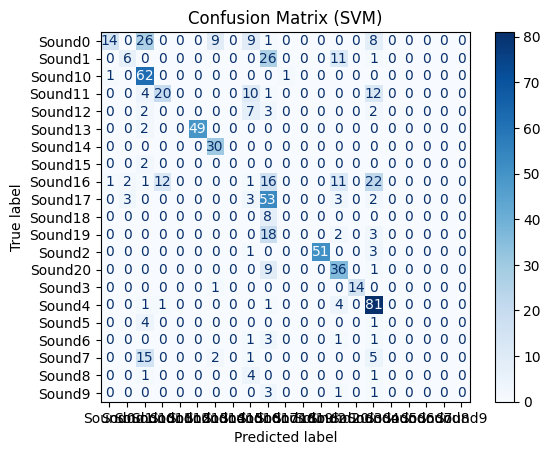

In [ ]:
# Hàm train và test mô hình SVM
def train_and_test_svm_with_confusion_matrix(train_dir, test_dir, sr=16000, n_mfcc=13):
    # Load dữ liệu
    print("Loading training data...")
    X_train, y_train = load_and_extract_features_from_folders(train_dir, sr, n_mfcc)
    
    print("Loading testing data...")
    X_test, y_test = load_and_extract_features_from_folders(test_dir, sr, n_mfcc)
    
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Huấn luyện mô hình SVM
    print("Training SVM model...")
    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_train, y_train)
    
    # Dự đoán trên tập test
    print("Testing SVM model...")
    y_pred = svm.predict(X_test)
    
    # Tính toán độ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Vẽ ma trận nhầm lẫn
    print("Generating confusion matrix...")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (SVM)")
    plt.show()

# Thư mục dữ liệu
train_dir = r'C:\Users\USER\Downloads\SV_NCKH_audio_event\Train'
test_dir = r'C:\Users\USER\Downloads\SV_NCKH_audio_event\Test'

# Gọi hàm huấn luyện và đánh giá
train_and_test_svm_with_confusion_matrix(train_dir, test_dir)

In [4]:
def train_and_test_svm(train_dir, test_dir, sr=16000, n_mfcc=13):
    # Load training data
    print("Loading training data...")
    X_train, y_train = load_and_extract_features_from_folders(train_dir, sr, n_mfcc)
    
    # Load testing data
    print("Loading testing data...")
    X_test, y_test = load_and_extract_features_from_folders(test_dir, sr, n_mfcc)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Train SVM classifier
    print("Training SVM model...")
    svm = SVC(kernel='rbf')  # You can change the kernel type and parameters
    svm.fit(X_train, y_train)
    
    # Make predictions on the test set
    print("Testing SVM model...")
    y_pred = svm.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)


In [5]:
# Example usage:
train_directory = r'C:\Users\USER\Downloads\SV_NCKH_audio_event\Train'
test_directory = r'C:\Users\USER\Downloads\SV_NCKH_audio_event\Test'

# Find the optimal SVM model
#best_svm_model = find_optimal_svm_parameters(train_directory)

# Evaluate the best SVM model on the test data
#evaluate_svm_on_test(best_svm_model, test_directory)
train_and_test_svm(train_directory, test_directory, sr=16000, n_mfcc=13)

Loading training data...
Loading testing data...
Training SVM model...
Testing SVM model...
Accuracy: 0.5720
Classification Report:
              precision    recall  f1-score   support

      Sound0       0.88      0.21      0.34        67
      Sound1       0.55      0.14      0.22        44
     Sound10       0.52      0.97      0.67        64
     Sound11       0.61      0.43      0.50        47
     Sound12       0.00      0.00      0.00        14
     Sound13       1.00      0.96      0.98        51
     Sound14       0.71      1.00      0.83        30
     Sound15       0.00      0.00      0.00         2
     Sound16       0.03      0.02      0.02        66
     Sound17       0.37      0.83      0.51        64
     Sound18       0.00      0.00      0.00         8
     Sound19       0.00      0.00      0.00        23
      Sound2       1.00      0.93      0.96        55
     Sound20       0.52      0.78      0.63        46
      Sound3       1.00      0.93      0.97        15
   

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefin

In [6]:
# Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (SVM)")
plt.show()

NameError: name 'y_test' is not defined